# An Insight On Success In Movie Production

## Overview

To stay on par with its tech industry competitors, Microsoft has decided to open a movie studio, but doesn't know where to start. In this project, I use data from movie databases such as IMDB and Box Office Mojo to analyze the elements of successful movies. By highlighting movie genres that are well-received and those that also make significant profits, I provide insights as to the possible routes Microsoft can take to flourish in movie production.

## Business Problem

As online streaming grows in popularity, you see more platforms being introduced by the day, some of them including Amazon Prime and Apple TV. These streaming platforms promise original content, most notably movies, and have been widely successful. In response to this boom, Microsoft has finally decided to make the move towards movie production as well to start out. However, it can be difficult to figure out what to do from there, but through meaningful analyses of the movie industry, we can gain a general direction of where to go.

In order to start off on the right foot, it's important to answer the question: **"What is a successful movie?"** From a business perspective, something is successful when it **turns a significant profit for the company**. Therefore, a successful movie at its core is a movie that generates a significant profit that offsets expenses from casting, production, etc. However. it's important to remember where this profit comes from, namely the people who pay for and watch these movies. By this logic, you could argue that **good ratings** also contribute largely to a movie's success.

In this analysis, I will be using my data analysis to try and answer these questions:

- Which kinds of movies generate the most profit?
- Which movies are best received by moviegoers (and critics)?
- Is there a significant relationship between profits and ratings?

By answering these questions, I hope to provide insight into what direction Microsoft should take moving forward into movie production.

## Data Understanding

For this project, I used tables from a larger SQL database, `movies.db`, that contains datasets from movie databases including IMDB, Box Office Mojo, and Rotten Tomatoes. Although the database includes other sources for movie data, for now I'll only be using data from these three sites.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [4]:
from src.make_db import create_movies_db
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [5]:
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

The `imdb_title_basics` table shows us basic information about all of the movies on IMDB, giving us a movie's titles, the year it premiered, its runtime, and the genres it falls under. The `tconst` column contains unique identifiers for movies in IMDB's database.

In [8]:
cur.execute("""SELECT * 
               FROM imdb_title_basics;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idx              146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


The `imdb_title_ratings` gives us the IMDB ratings for movies on the site and the number of votes for those movies. Instead of titles, we have the `tconst` column to identify each movie with their ratings.

In [10]:
cur.execute("""SELECT * 
               FROM imdb_title_ratings;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,tconst,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idx            73856 non-null  int64  
 1   tconst         73856 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ MB


The `bom_movie_gross` dataset from Box Office Mojo gives us the domestic and foreign gross information for movies within their database.

In [12]:
cur.execute("""SELECT * 
               FROM bom_movie_gross
               ORDER BY domestic_gross DESC;""")
test_df = pd.DataFrame(cur.fetchall())
test_df.columns = [x[0] for x in cur.description]
test_df.head(5)

,idx,title,studio,domestic_gross,foreign_gross,year
0,1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1,3080,Black Panther,BV,700100000.0,646900000,2018
2,3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
4,727,Marvel's The Avengers,BV,623400000.0,895500000,2012


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idx            73856 non-null  int64  
 1   tconst         73856 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ MB


The `rotten_tomatoes_movies` dataset gives us information from the popular website Rotten Tomatoes in table form with various aspects of information on movies as you can see from their website, including basic movie information and their ratings.

In [14]:
cur.execute("""SELECT * 
               FROM rotten_tomatoes_movies;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   idx                               17712 non-null  int64  
 1   rotten_tomatoes_link              17712 non-null  object 
 2   movie_title                       17712 non-null  object 
 3   movie_info                        17391 non-null  object 
 4   critics_consensus                 9134 non-null   object 
 5   content_rating                    17712 non-null  object 
 6   genres                            17693 non-null  object 
 7   directors                         17518 non-null  object 
 8   authors                           16170 non-null  object 
 9   actors                            17360 non-null  object 
 10  original_release_date             16546 non-null  object 
 11  streaming_release_date            17328 non-null  object 
 12  runt

## Data Preparation

To create the datasets I used in my analysis, I use SQL queries to join tables from `movies.db` database to ensure that my datasets only contain the most relevant data to my analysis, instead of going through each table individually to drop unnecessary columns. Then I store the data I called with those SQL queries into Pandas dataframes and clean them as necessary.

For my first dataframe `gross_df`, I join the `bom_movie_gross` and `imdb_title_basics` datasets. Here I join both datasets on the movies both of them share and also get the domestic and foreign gross values and genres for all movies to return into the dataframe.

In [16]:
cur.execute("""SELECT b.title AS movie, b.domestic_gross, b.foreign_gross, m.genres 
               FROM bom_movie_gross b
               JOIN imdb_title_basics m
               ON b.title = m.primary_title
               GROUP BY movie;""")
gross_df = pd.DataFrame(cur.fetchall())
gross_df.columns = [x[0] for x in cur.description]
gross_df.head()

,movie,domestic_gross,foreign_gross,genres
0,'71,1300000.0,355000,"Action,Drama,Thriller"
1,"1,000 Times Good Night",53900.0,None,"Drama,War"
2,10 Cloverfield Lane,72100000.0,38100000,"Drama,Horror,Mystery"
3,10 Years,203000.0,None,"Comedy,Drama,Romance"
4,1001 Grams,11000.0,None,Drama


Earlier when exploring the data, I discovered that the `foreign_gross` column had object type entries (in this case strings) instead of floats like the domestic gross column, so here I change the whole column to `float` type before proceeding.

In [17]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','').astype(float)

Then I create the `total_gross` column to determine the total gross profit movies had made. This information will become relevant when I plot out the gross information later.

In [18]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(0)
gross_df = gross_df.dropna(subset = ['domestic_gross'])
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

I also wanted to investigate the relationship between gross profit and individual genres, but discovered that all the entries in the `genres` column were all single strings. I make a new column, `split_genres`, to create a list containing the individual genres of each movie entry as indicated by commas in the strings of the `genres` column.

In [19]:
gross_df['split_genres'] = gross_df['genres'].str.split(',')
gross_df = gross_df.dropna(subset = ['genres'])
gross_df.head()

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,"[Drama, War]"
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,"[Drama, Horror, Mystery]"
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,"[Comedy, Drama, Romance]"
4,1001 Grams,11000.0,0.0,Drama,11000.0,[Drama]


To be able to plot out my data by individual genres, I used the `.explode()` command to split the genres into individual columns. I assigned the dataframe with split rows to a new dataframe, `split_gross_df`, in case I needed to do additional analysis on the original `gross_df` later.

In [20]:
split_gross_df = gross_df.explode('split_genres')
split_gross_df.head(10)

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,Action
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,Drama
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,Thriller
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,Drama
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,War
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,Drama
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,Horror
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,Mystery
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,Comedy
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,Drama


In [21]:
gross_df.isna().sum()

movie             0
domestic_gross    0
foreign_gross     0
genres            0
total_gross       0
split_genres      0
dtype: int64

Using the same process as `gross_df`, I then created `ratings_df` for investigating the average ratings of movies based on genre. For this join, since both tables are from IMDB, I join both tables where the `tconst` value is shared.

In [22]:
cur.execute("""SELECT m.primary_title, r.averagerating, r.numvotes, m.genres
               FROM imdb_title_basics m
               JOIN imdb_title_ratings r
               USING(tconst);""")
ratings_df = pd.DataFrame(cur.fetchall())
ratings_df.columns = [x[0] for x in cur.description]
ratings_df

,primary_title,averagerating,numvotes,genres
0,Sunghursh,7.0,77,"Action,Crime,Drama"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama"
2,The Other Side of the Wind,6.9,4517,Drama
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy"
...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary
73852,Sokagin Çocuklari,8.7,136,"Drama,Family"
73853,Albatross,8.5,8,Documentary
73854,La vida sense la Sara Amat,6.6,5,None


Once again, I follow the same steps to separate the genres for each movie and assign the dataframe with split genres for all the movies to `split_ratings_df`.

In [23]:
ratings_df['split_genres'] = ratings_df['genres'].str.split(',')
ratings_df

,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama","[Action, Crime, Drama]"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama","[Biography, Drama]"
2,The Other Side of the Wind,6.9,4517,Drama,[Drama]
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama","[Comedy, Drama]"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
...,...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary,[Documentary]
73852,Sokagin Çocuklari,8.7,136,"Drama,Family","[Drama, Family]"
73853,Albatross,8.5,8,Documentary,[Documentary]
73854,La vida sense la Sara Amat,6.6,5,None,None


In [24]:
ratings_df = ratings_df.dropna(subset = ['genres'])
split_ratings_df = ratings_df.explode('split_genres')
split_ratings_df.head(10)

,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama",Action
0,Sunghursh,7.0,77,"Action,Crime,Drama",Crime
0,Sunghursh,7.0,77,"Action,Crime,Drama",Drama
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Biography
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Drama
2,The Other Side of the Wind,6.9,4517,Drama,Drama
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama",Comedy
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama",Drama
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy",Comedy
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy",Drama


After dealing with splitting the genres in `ratings_df`, I got curious about popular and well-received genre combinations. Seeing as there were a good number of them before, I wanted to filter out genre combinations based on how many movies had those combinations, and chose a threshold of 500 movies. I go ahead and store this information into the `combined_ratings_df` to distinguish it from the other rating dataframes

In [25]:
x_df = ratings_df.groupby('genres').count().iloc[:,0]
x2_df = x_df[x_df >= 500].index
combined_ratings_df = ratings_df[ratings_df.genres.isin(x2_df)]
combined_ratings_df.groupby('genres').mean().head()

,averagerating,numvotes
genres,,
Action,5.757712,336.115424
"Action,Crime,Drama",5.989146,9899.560498
"Biography,Documentary",7.221758,289.139769
Comedy,5.777998,1217.181008
"Comedy,Drama",6.364119,2469.560183


To look for a possible relationship between a movie's profits and ratings, I merged the original dataframes `gross_df` and `ratings_df` to reduce the amount of duplicate entries for all the movies in both dataframes.

In [26]:
gross_and_ratings_df = gross_df.merge(ratings_df, left_on='movie', right_on='primary_title', suffixes=('', '_y'))
gross_and_ratings_df.head()

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres,primary_title,averagerating,numvotes,genres_y,split_genres_y
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,"[Action, Drama, Thriller]",'71,7.2,46103,"Action,Drama,Thriller","[Action, Drama, Thriller]"
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,"[Drama, War]","1,000 Times Good Night",7.1,6848,"Drama,War","[Drama, War]"
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,"[Drama, Horror, Mystery]",10 Cloverfield Lane,7.2,260383,"Drama,Horror,Mystery","[Drama, Horror, Mystery]"
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,"[Comedy, Drama, Romance]",10 Years,6.1,22484,"Comedy,Drama,Romance","[Comedy, Drama, Romance]"
4,1001 Grams,11000.0,0.0,Drama,11000.0,[Drama],1001 Grams,6.3,1301,Drama,[Drama]


To further investigate ratings, particularly between audiences and critics, I created `rotten_tomatoes_df` as well. Like the previous dataframes, I split the genres here as well and create the `split_tomatoes_df` dataframe.

In [27]:
cur.execute("""SELECT movie_title, genres, tomatometer_status, tomatometer_rating, tomatometer_count, audience_status, audience_rating, audience_count
               FROM rotten_tomatoes_movies
               ORDER BY audience_count DESC
               LIMIT 1000;""")
rotten_tomatoes_df = pd.DataFrame(cur.fetchall())
rotten_tomatoes_df.columns = [x[0] for x in cur.description]
rotten_tomatoes_df.head(5)

,movie_title,genres,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count
0,Titanic,"Drama, Romance",Certified-Fresh,89.0,192.0,Upright,69.0,35797635.0
1,The Lord of the Rings: The Return of the King,"Action & Adventure, Classics, Science Fiction ...",Certified-Fresh,93.0,275.0,Upright,86.0,34679773.0
2,Spider-Man,"Action & Adventure, Mystery & Suspense, Scienc...",Certified-Fresh,90.0,245.0,Upright,67.0,34297354.0
3,Shrek 2,"Animation, Comedy, Kids & Family, Science Fict...",Certified-Fresh,89.0,236.0,Upright,69.0,34232524.0
4,Harry Potter and the Goblet of Fire,"Action & Adventure, Kids & Family, Science Fic...",Certified-Fresh,88.0,255.0,Upright,74.0,34153607.0


In [28]:
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['genres'].str.split(',')
rotten_tomatoes_df = rotten_tomatoes_df.explode('split_genres')
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['split_genres'].str.lstrip(" ")

In [29]:
split_tomatoes_df = rotten_tomatoes_df.groupby('split_genres').mean()
split_tomatoes_df.head()

,tomatometer_rating,tomatometer_count,audience_rating,audience_count
split_genres,,,,
Action & Adventure,59.341463,159.509756,66.839024,1.944110e+06
Animation,76.010870,135.000000,73.086957,1.653685e+06
Art House & International,85.333333,182.000000,81.000000,4.090327e+05
Classics,80.750000,113.071429,81.642857,4.141992e+06
Comedy,54.342466,130.698630,64.849315,2.446065e+06


## Data Modeling and Analysis

To model the data that I have prepared, I primarily use bar graphs. Since I want to show the differences in my chosen variables, gross and ratings, across different genres, I made the decision to use bar graphs to contrast the differences between genres to support my analyses. I then apply descriptive analysis to point out trends in the data that provides helpful suggestions for Microsoft to start with better ideas on how they can make successful movies.



In [30]:
alphabetical_genres = split_gross_df.split_genres.unique()
alphabetical_genres.sort()

To figure our which movies are the most profitable, I compare the total gross profits across each individual movie genre in `gross_df`, denoting the average portion of the total gross which was made domestically. It seems that in both domestic and foreign box offices, Adventure, Animated and Sci-Fi movies perform the best and return the most profit.

Text(0.5, 1.0, 'Average Gross Profit Based On Genre')

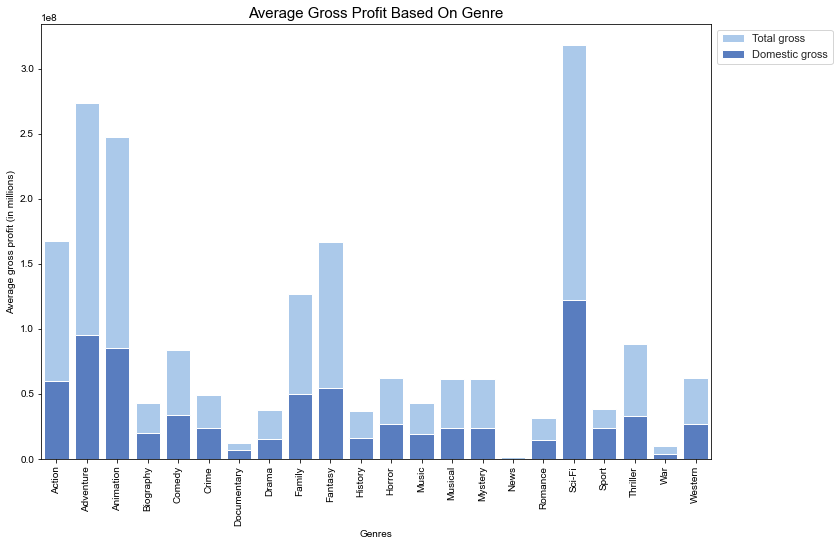

In [31]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(x='split_genres', y='total_gross', data=split_gross_df, label='Total gross', color='b', ci=None, order=alphabetical_genres)

sns.set_color_codes('muted')
sns.barplot(x='split_genres', y='domestic_gross', data=split_gross_df, label='Domestic gross', color='b', ci=None, order=alphabetical_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.19, 1), loc="upper right", frameon=True)
ax.set_xlabel('Genres')
ax.set_ylabel('Average gross profit (in millions)')
ax.set_title('Average Gross Profit Based On Genre', fontsize=15)

In contrast, while looking at the data from rating_df of IMDB's ratings, the higher-grossing genres aren't as favorable with audiences as others. While Sci-Fi, Action, and Horror are among the genres with the least favorable ratings, less fictional genres like Documentary, History, and News tend to have higher ratings overall.

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Individual Genres)')

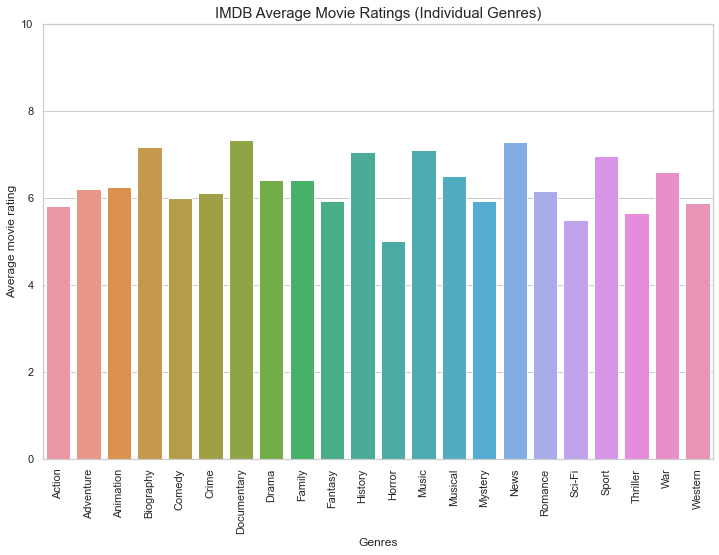

In [32]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.barplot(x='split_genres', y='averagerating', data=split_ratings_df, ci=None, order=alphabetical_genres, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Individual Genres)', fontsize=15)

We also see non-fictional genres being more favored here, where combinations of the highest rated genres from the previous graph are among the highest rated here as well, such as the Biography, Documentary and Documentary, Music genres.

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Combined Genres)')

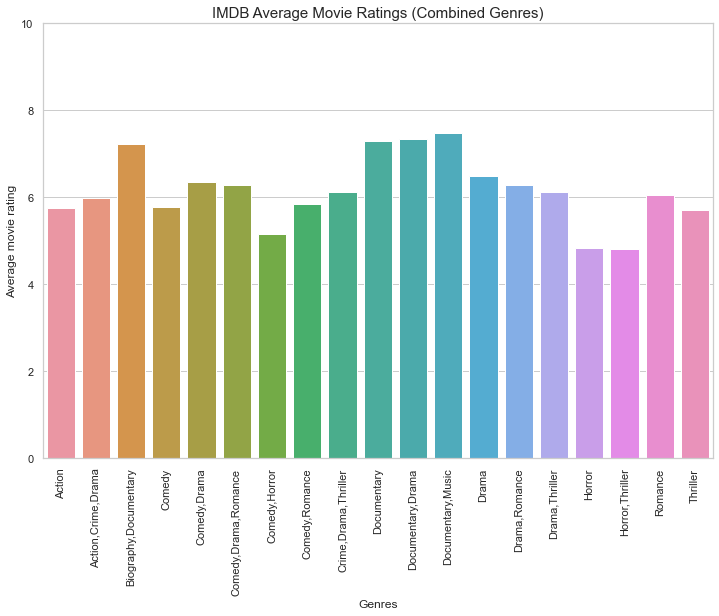

In [33]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='genres', y='averagerating', data=combined_ratings_df,
                order=x2_df, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Combined Genres)', fontsize=15)

On Rotten Tomatoes ratings, however, Documentary films aren't rated as favorably as on IMDB. Instead, the highest rated genre is Art House & International, which is used to classify films aimed at niche, smaller demographics rather than the mass of moviegoers. As such, these movies are often praised for unique elements that set them above other broader genres, which might explain their high ratings, particularly among critics.

Another notable observation is that while audience ratings tend to be similar to critics', there are some genres that perform better among audiences than critics, such as Comedy, Horror, and Romance. This may be because audience ratings on Rotten Tomatoes are more based on entertainment value than critics' reviews, which focus more on details and structure within a movie.

Text(0, 0.5, 'Rating')

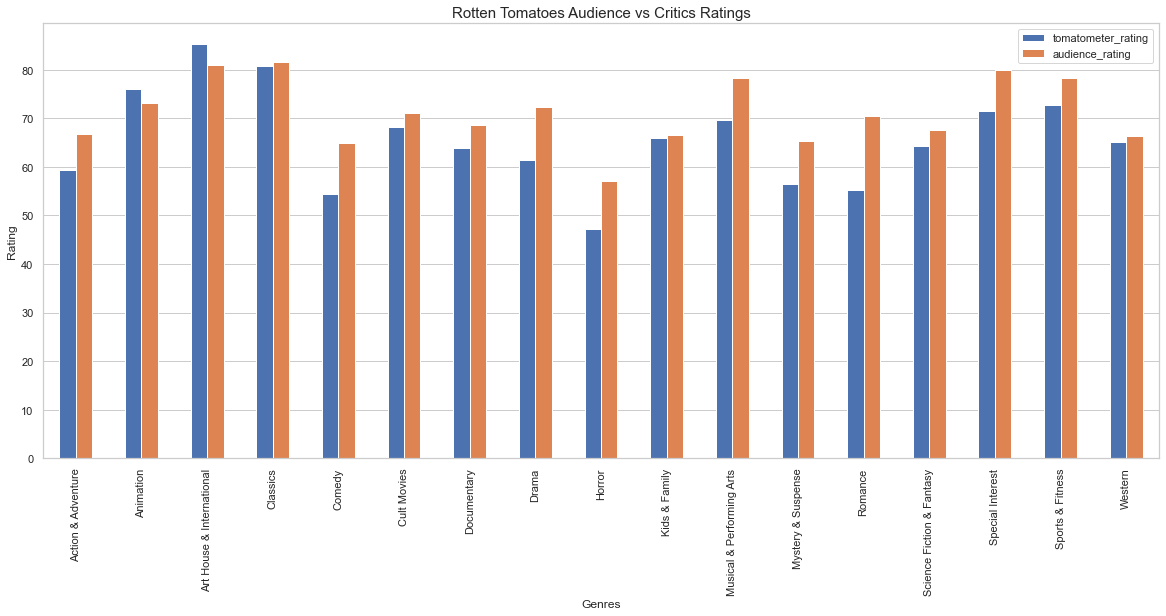

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
split_tomatoes_df[['tomatometer_rating', 'audience_rating']].plot(kind='bar', ax=ax)
ax.grid(axis='x')
ax.set_title('Rotten Tomatoes Audience vs Critics Ratings', fontsize=15)
ax.set_xlabel('Genres')
ax.set_ylabel('Rating')

Finally, I wanted to see if there was any relationship between genre and rating. "Successful" and "good" are positive connotations to describe movies, and are often used synchronously. Plotting out `gross_and_ratings_df`, however, shows a positive yet weak correlation between gross profits and average movie ratings. In particular, it seems that the majority of movies with the highest profits actually have very average ratings. Therefore, we can make the distinction between a "successful" movie and a "good" movie; just because a movie is high-grossing doesn't mean it's good, and vice versa.

Text(0, 0.5, 'Average rating')

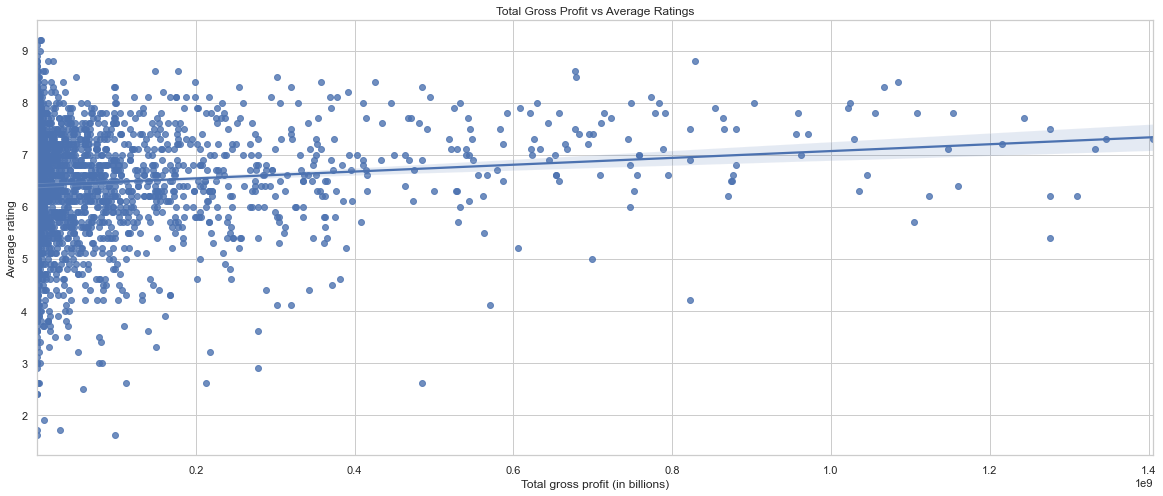

In [35]:
f, ax = plt.subplots(figsize=(20,8))
sns.regplot(x="total_gross", y="averagerating", data=gross_and_ratings_df, ax=ax)
ax.set_title('Total Gross Profit vs Average Ratings')
ax.set_xlabel('Total gross profit (in billions)')
ax.set_ylabel('Average rating')

## Conclusions

Based on the results of the analysis, these are the main recommendations I would make to Microsoft:

- **Focus on quality over quantity.** While rating may not be a strong determinant of a movie's success, in order to promote growth and set the audience's expectations and anticipation high for your future works, it is important to make movies of high quality that, at the same time, will turn profits.
- **Combine genre elements in the premises for your first movies.** For instance, you could produce an sci-fi film based on historical events and include unique elements to keep the audience's attention.
- For now, **keep production budgets low while focusing on quality.** Although we didn't have the chance to look at the production budgets of successful movies, in general when starting out as a movie producer, it shouldn't be necessary to utilize a large budget that will be hard to make up later in the box office. One way you can go about doing this is hiring newer, up and coming staff members when producing your first movies.

While this analysis provides a basic foundation on where to start producing movies by showing which movies perform better than others, there are other variables that go into a movie's success beyond the scope of what can be captured by data, and have not been fully explored here. Going forward, it's important to be aware of the limitations set by being a newer movie production company and making decisions while weighing the risks versus returns of venturing into movie production.

In the future, Microsoft would benefit from further analysis of other aspects of movies such as:

- **Production budgets of successful and unsuccessful movies** so they can come up with a better estimate of how much it would cost to produce a high quality movie.
- **The impact of certain well-known directors and/or actors on movie success.**
- **Certain characteristics of high-rating movie reviews** to be able to create a script and set standards during movie production based on specific elements that critics and audience members favor in highly-rated movies.